# Import Library

In [ ]:
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# Load Data

In [ ]:
!git clone https://github.com/Hafiyyanrevi/Drug-Side-Effect-Prediction-GSA-SVM.git data_TA

Cloning into 'data_TA'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 156 (delta 49), reused 54 (delta 21), pack-reused 64 (from 1)
Receiving objects: 100% (156/156), 658.53 KiB | 3.87 MiB/s, done.
Resolving deltas: 100% (62/62), done.


**Load the pickle file of best model**

In [ ]:
with open('data_TA/results/HyperparameterTuning/Linear/best_model_linear.pkl', 'rb') as pickle_file:
    best_model_linear = joblib.load(pickle_file)
with open('data_TA/results/HyperparameterTuning/RBF/best_model_rbf.pkl', 'rb') as pickle_file:
    best_model_rbf = joblib.load(pickle_file)
with open('data_TA/results/HyperparameterTuning/Polynomial/best_model_poly.pkl', 'rb') as pickle_file:
    best_model_poly = joblib.load(pickle_file)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


**Load the pickle file of best features**

In [ ]:
with open('data_TA/results/FeatureSelection/linear/theBest_features_linear.pkl', 'rb') as pickle_file:
    theBest_features_linear = joblib.load(pickle_file)
with open('data_TA/results/FeatureSelection/rbf/theBest_features_rbf.pkl', 'rb') as pickle_file:
    theBest_features_rbf = joblib.load(pickle_file)
with open('data_TA/results/FeatureSelection/polynomial/theBest_features_poly.pkl', 'rb') as pickle_file:
    theBest_features_poly = joblib.load(pickle_file)

**Load the training data and test data**

In [ ]:
X_train = pd.read_csv('data_TA/results/PreProcessing/X_train_smilesdataset.csv')
y_train = pd.read_csv('data_TA/results/PreProcessing/y_train_smilesdataset.csv')

In [ ]:
X_test = pd.read_csv('data_TA/results/PreProcessing/X_test_smilesdataset.csv')
y_test = pd.read_csv('data_TA/results/PreProcessing/y_test_smilesdataset.csv')

In [ ]:
X_train_selected_linear = X_train.loc[:, theBest_features_linear]
X_test_selected_linear = X_test.loc[:, theBest_features_linear]

In [ ]:
X_train_selected_rbf = X_train.loc[:, theBest_features_rbf]
X_test_selected_rbf = X_test.loc[:, theBest_features_rbf]

In [ ]:
X_train_selected_poly = X_train.loc[:, theBest_features_poly]
X_test_selected_poly = X_test.loc[:, theBest_features_poly]

In [ ]:
y_test = y_test.squeeze()

# Linear

**Train**

**Prediction on training data**

In [ ]:
y_pred = best_model_linear.predict(X_train_selected_linear)

**Confusion matrix**

In [ ]:
cm = confusion_matrix(y_train, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

**Calculate the evaluation metrics**

In [ ]:
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

# Check if the model supports predict_proba (only applicable for certain models like SVC with probability=True)
if hasattr(best_model_linear, "predict_proba"):
    auc = roc_auc_score(y_train, best_model_linear.predict_proba(X_train_selected_linear)[:, 1])
else:
    auc = "N/A"

**Showing the results**

========================  Linear (Train)  ========================
Accuracy: 0.7277
Precision: 0.7248
Recall: 0.7339
F1-Score: 0.7293
AUC: Not applicable for this model.

Confusion Matrix for Best Model of Linear:
                 Predicted Negative  Predicted Positive
Actual Negative                 347                 134
Actual Positive                 128                 353



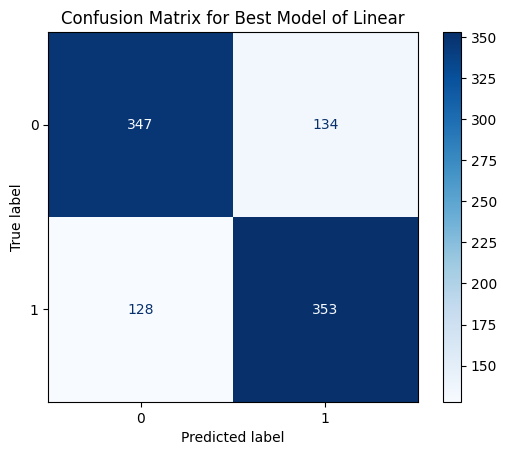

In [ ]:
print("========================  Linear (Train)  ========================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display AUC only if it's available
if auc != "N/A":
    print(f"AUC: {auc:.4f}")
else:
    print("AUC: Not applicable for this model.")

print("")

cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix for Best Model of Linear:")
print(cm_df)

print("")

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best Model of Linear')
plt.show()

**Test**

**Prediction on test data**

In [ ]:
y_pred = best_model_linear.predict(X_test_selected_linear)

**Confusion matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

**Calculate the evaluation metrics**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Check if the model supports predict_proba (only applicable for certain models like SVC with probability=True)
if hasattr(best_model_linear, "predict_proba"):
    auc = roc_auc_score(y_train, best_model_linear.predict_proba(X_test_selected_linear)[:, 1])
else:
    auc = "N/A"

**Showing the results**

========================   Linear (Test)   ========================
Accuracy: 0.5872
Precision: 0.6961
Recall: 0.6117
F1-Score: 0.6512
AUC: Not applicable for this model.

Confusion Matrix Table for Best Model of Linear:
                 Predicted Negative  Predicted Positive
Actual Negative                  66                  55
Actual Positive                  80                 126



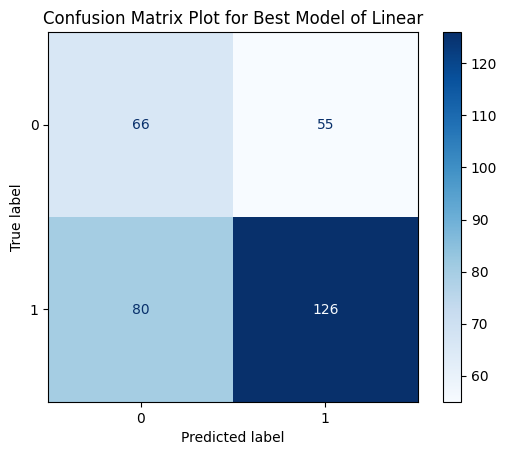

In [ ]:
print("========================   Linear (Test)   ========================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display AUC only if it's available
if auc != "N/A":
    print(f"AUC: {auc:.4f}")
else:
    print("AUC: Not applicable for this model.")

print("")

cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix Table for Best Model of Linear:")
print(cm_df)

print("")

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Plot for Best Model of Linear')
plt.show()

# RBF

**Train**

**Prediction on training data**

In [ ]:
y_pred = best_model_rbf.predict(X_train_selected_rbf)

**Confusion matrix**

In [ ]:
cm = confusion_matrix(y_train, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

**Calculate the evaluation metrics**

In [ ]:
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

# Check if the model supports predict_proba (only applicable for certain models like SVC with probability=True)
if hasattr(best_model_rbf, "predict_proba"):
    auc = roc_auc_score(y_train, best_model_rbf.predict_proba(X_train_selected_rbf)[:, 1])
else:
    auc = "N/A"

**Showing the results**

========================   RBF (Train)   ========================
Accuracy: 0.9792
Precision: 0.9978
Recall: 0.9605
F1-Score: 0.9788
AUC: Not applicable for this model.

Confusion Matrix Table for Best Model of RBF:
                 Predicted Negative  Predicted Positive
Actual Negative                 480                   1
Actual Positive                  19                 462



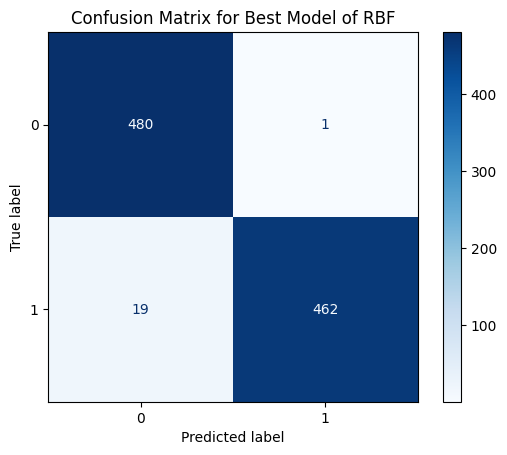

In [ ]:
print("========================   RBF (Train)   ========================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display AUC only if it's available
if auc != "N/A":
    print(f"AUC: {auc:.4f}")
else:
    print("AUC: Not applicable for this model.")

print("")

cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix Table for Best Model of RBF:")
print(cm_df)

print("")

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best Model of RBF')
plt.show()

**Test**

**Prediction on test data**

In [ ]:
y_pred = best_model_rbf.predict(X_test_selected_rbf)

**Confusion matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

**Calculate the evaluation metrics**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Check if the model supports predict_proba (only applicable for certain models like SVC with probability=True)
if hasattr(best_model_rbf, "predict_proba"):
    auc = roc_auc_score(y_train, best_model_rbf.predict_proba(X_test_selected_rbf)[:, 1])
else:
    auc = "N/A"

**Showing the results**

========================   RBF (Test)   ========================
Accuracy: 0.6391
Precision: 0.7095
Recall: 0.7233
F1-Score: 0.7163
AUC: Not applicable for this model.

Confusion Matrix Table for Best Model of RBF:
                 Predicted Negative  Predicted Positive
Actual Negative                  60                  61
Actual Positive                  57                 149



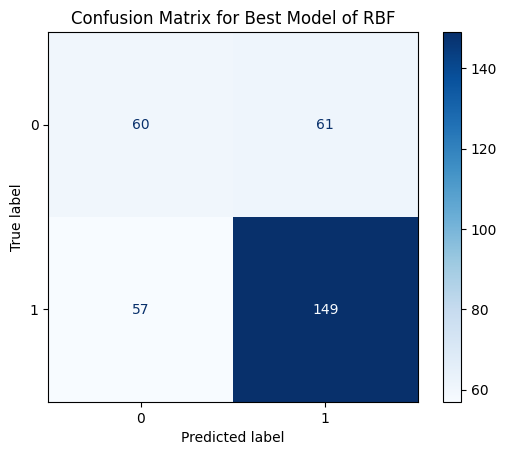

In [ ]:
print("========================   RBF (Test)   ========================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display AUC only if it's available
if auc != "N/A":
    print(f"AUC: {auc:.4f}")
else:
    print("AUC: Not applicable for this model.")

print("")

cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix Table for Best Model of RBF:")
print(cm_df)

print("")

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best Model of RBF')
plt.show()

# Polynomial

**Train**

**Prediction on training data**

In [ ]:
y_pred = best_model_poly.predict(X_train_selected_poly)

**Confusion matrix**

In [ ]:
cm = confusion_matrix(y_train, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

**Calculate the evaluation metrics**

In [ ]:
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

# Check if the model supports predict_proba (only applicable for certain models like SVC with probability=True)
if hasattr(best_model_poly, "predict_proba"):
    auc = roc_auc_score(y_train, best_model_poly.predict_proba(X_train_selected_poly)[:, 1])
else:
    auc = "N/A"

**Showing the results**

========================   Polynomial (Train)   ========================
Accuracy: 0.9470
Precision: 0.9886
Recall: 0.9044
F1-Score: 0.9446
AUC: Not applicable for this model.

Confusion Matrix Table for Best Model of Polynomial:
                 Predicted Negative  Predicted Positive
Actual Negative                 476                   5
Actual Positive                  46                 435



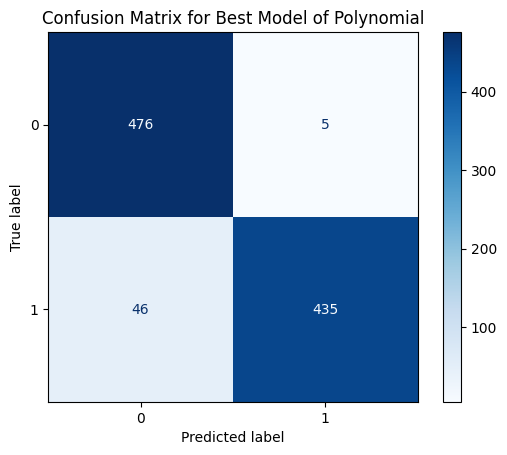

In [ ]:
print("========================   Polynomial (Train)   ========================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display AUC only if it's available
if auc != "N/A":
    print(f"AUC: {auc:.4f}")
else:
    print("AUC: Not applicable for this model.")

print("")

cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix Table for Best Model of Polynomial:")
print(cm_df)

print("")

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best Model of Polynomial')
plt.show()

**Test**

**Prediction on test data**

In [ ]:
y_pred = best_model_poly.predict(X_test_selected_poly)

**Confusion matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

**Calculate the evaluation metrics**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Check if the model supports predict_proba (only applicable for certain models like SVC with probability=True)
if hasattr(best_model_poly, "predict_proba"):
    auc = roc_auc_score(y_train, best_model_poly.predict_proba(X_test_selected_poly)[:, 1])
else:
    auc = "N/A"

**Showing the results**

========================   Polynomial (Test)   ========================
Accuracy: 0.6086
Precision: 0.7216
Recall: 0.6165
F1-Score: 0.6649
AUC: Not applicable for this model.

Confusion Matrix Table for Best Model of Polynomial:
                 Predicted Negative  Predicted Positive
Actual Negative                  72                  49
Actual Positive                  79                 127



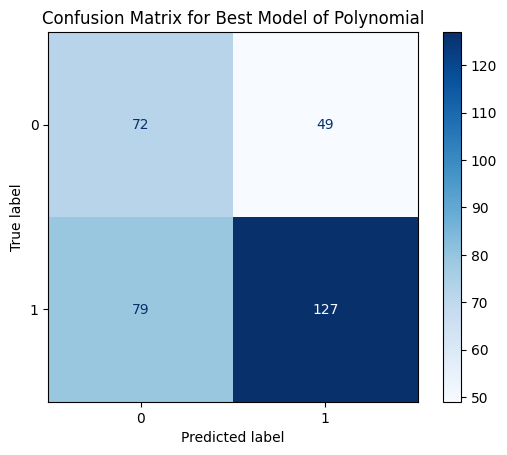

In [ ]:
print("========================   Polynomial (Test)   ========================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display AUC only if it's available
if auc != "N/A":
    print(f"AUC: {auc:.4f}")
else:
    print("AUC: Not applicable for this model.")

print("")

cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix Table for Best Model of Polynomial:")
print(cm_df)

print("")

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best Model of Polynomial')
plt.show()